In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import re
from textblob import TextBlob
import os
import tweepy as tw
import pandas as pd

In [2]:
dc_data = pd.read_csv('DailyComments.csv')

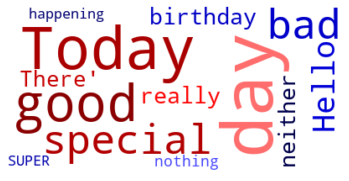

In [3]:
# create a wordcloud to show most popular words
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
text = " ".join(comment for comment in dc_data.comments)
wordcloud = WordCloud(background_color="white", stopwords=stopwords, colormap='seismic').generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [4]:
# create a polarity score function to idenitify the polarity of each word
# The polarity score ranges from -1 to 1 and is applied to each word within a string. 
# Positively connoted words receive a score of 1 while negative words are marked with -1. 
# The average of these scores within a string produces the final polarity score.
def polarity_score(string):
    from nltk.corpus import stopwords
    tb = TextBlob(string)
    stop = [word for word in tb.words if word not in stopwords.words('english')]
    final = " ".join(stop)
    return TextBlob(final).sentiment.polarity

In [5]:
dc_data['polarity_score'] = dc_data['comments'].apply(lambda x: polarity_score(x))
dc_data

,Day of Week,comments,polarity_score
0,Monday,"Hello, how are you?",0.000000e+00
1,Tuesday,Today is a good day!,7.000000e-01
2,Wednesday,It's my birthday so it's a really special day!,3.571429e-01
3,Thursday,Today is neither a good day or a bad day!,5.551115e-17
4,Friday,I'm having a bad day.,-7.000000e-01
5,Saturday,There' s nothing special happening today.,3.571429e-01
6,Sunday,Today is a SUPER good day!,5.166667e-01


In [6]:
# Create a sentiment identifier based on the polarity score
def sentiment_score(x):
    if x > 0:
        return "Positive"
    elif x < 0:
        return "Negative"
    else:
        return "Neutral"

In [7]:
dc_data['sentiment'] = dc_data['polarity_score'].apply(lambda x: sentiment_score(x))
dc_data

,Day of Week,comments,polarity_score,sentiment
0,Monday,"Hello, how are you?",0.000000e+00,Neutral
1,Tuesday,Today is a good day!,7.000000e-01,Positive
2,Wednesday,It's my birthday so it's a really special day!,3.571429e-01,Positive
3,Thursday,Today is neither a good day or a bad day!,5.551115e-17,Positive
4,Friday,I'm having a bad day.,-7.000000e-01,Negative
5,Saturday,There' s nothing special happening today.,3.571429e-01,Positive
6,Sunday,Today is a SUPER good day!,5.166667e-01,Positive


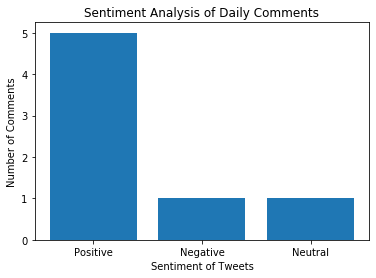

In [25]:
bar_data = pd.DataFrame(dc_data.groupby('sentiment')['comments'].count()).reset_index().sort_values(by='comments', ascending = False)
plt.bar(bar_data['sentiment'], bar_data['comments'])
plt.title("Sentiment Analysis of Daily Comments")
plt.ylabel('Number of Comments')
plt.xlabel('Sentiment of Tweets')
plt.show()

In [14]:
# For my extra credit, I am going to look at all the tweets with the hashtag #CamNewton on the sunday and monday
# of the last Patriots game. This way I can compare the sentiment of the tweets about Cam prior to the game, 
# during the game and after the game
consumer_key= 'LThb4n0zKLlTmuEfajhktMfKy'
consumer_secret= '30miGhyGi4qAoEvQMkzncJdXSm1Dm9dQJuh7WhIOl9IlFdq74q'
access_token= '1258198040801955840-FrdXpAZaMq3buD0I611tQvYG0SAVyS'
access_token_secret= 'HLSS3Mov68oIdl9ejeET8UdNUkRPRl4MeQ0G3pdCjrGBo'
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [15]:
search_words = "#CamNewton" + " -filter:retweets"
date_since = "2020-09-20"
date_until = "2020-09-22"
tweets = tw.Cursor(api.search,q=search_words,ang="en",since=date_since,until=date_until).items()
cam_df = pd.DataFrame([[tweet.text,tweet.created_at] for tweet in tweets],columns=['tweet', "date"])
# Saving to a CSV due to twitter only allowing you to pull tweets within 10 days. Can use for future review
cam_df.to_csv('cam_tweets.csv')

In [18]:
cam_df['polarity_score'] = cam_df['tweet'].apply(lambda x: polarity_score(x))
cam_df['sentiment'] = cam_df['polarity_score'].apply(lambda x: sentiment_score(x))
cam_df['Weekday'] = cam_df['date'].dt.day_name()
cam_df

,tweet,date,polarity_score,sentiment,Weekday,Time
0,Week 2 @presidentmal #jamaladams #nfl #seattle...,2020-09-21 23:39:33,0.000000,Neutral,Monday,23:39:33
1,@ahardy316 @Fingrz692 @JerseyKidPicks @EnterPr...,2020-09-21 23:33:26,0.068182,Positive,Monday,23:33:26
2,"Just remember, everyone on ESPN &amp; FS1 who ...",2020-09-21 22:50:48,0.000000,Neutral,Monday,22:50:48
3,When you see your work bestie during your lunc...,2020-09-21 22:28:53,0.000000,Neutral,Monday,22:28:53
4,Excited to share the latest addition to my #et...,2020-09-21 22:05:00,0.337121,Positive,Monday,22:05:00
...,...,...,...,...,...,...
593,Que pensaban los #dolphins que sin #tombrady y...,2020-09-20 10:56:12,0.000000,Neutral,Sunday,10:56:12
594,Cam Newton + Bill Belichick= ???? #NFL #Patrio...,2020-09-20 03:51:49,0.000000,Neutral,Sunday,03:51:49
595,#sports #blog #sportsblog #nba #nfl #mlb #nhl ...,2020-09-20 03:17:59,0.000000,Neutral,Sunday,03:17:59
596,#sports #blog #sportsblog #nba #nfl #mlb #nhl ...,2020-09-20 02:36:16,0.000000,Neutral,Sunday,02:36:16


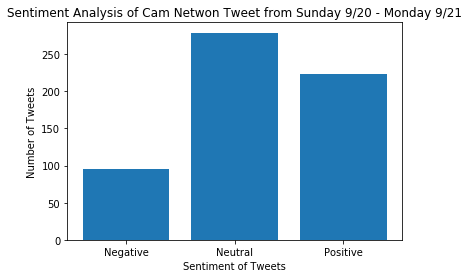

In [23]:
# this graph shows that overall, the tweets about Cam Newton were mainly Neutral and Positive
cam_bar_data = pd.DataFrame(cam_df.groupby('sentiment')['tweet'].count()).reset_index()
plt.bar(cam_bar_data['sentiment'], cam_bar_data['tweet'])
plt.title("Sentiment Analysis of Cam Netwon Tweet from Sunday 9/20 - Monday 9/21")
plt.ylabel('Number of Tweets')
plt.xlabel('Sentiment of Tweets')
plt.show()

In [26]:
# Categorize the tweet to be either pregame, postgame or in game based on the time.For reference, the game started
# at 8:30 Sunday night and ended around midnight Sunday
import datetime
kickoff = datetime.datetime(2020, 9, 20, 20, 30, 0)
conditions = [(cam_df['Weekday'] == "Monday"),(cam_df['Weekday'] == "Sunday") & (cam_df['date'] < kickoff),
              (cam_df['Weekday'] == "Sunday") & (cam_df['date'] > kickoff)]
choices = ["Postgame", "Pregame", "In_Game"]
cam_df['Game_Type'] = np.select(conditions, choices, default = "In_Game")
cam_df

,tweet,date,polarity_score,sentiment,Weekday,Time,Game_Type
0,Week 2 @presidentmal #jamaladams #nfl #seattle...,2020-09-21 23:39:33,0.000000,Neutral,Monday,23:39:33,Postgame
1,@ahardy316 @Fingrz692 @JerseyKidPicks @EnterPr...,2020-09-21 23:33:26,0.068182,Positive,Monday,23:33:26,Postgame
2,"Just remember, everyone on ESPN &amp; FS1 who ...",2020-09-21 22:50:48,0.000000,Neutral,Monday,22:50:48,Postgame
3,When you see your work bestie during your lunc...,2020-09-21 22:28:53,0.000000,Neutral,Monday,22:28:53,Postgame
4,Excited to share the latest addition to my #et...,2020-09-21 22:05:00,0.337121,Positive,Monday,22:05:00,Postgame
...,...,...,...,...,...,...,...
593,Que pensaban los #dolphins que sin #tombrady y...,2020-09-20 10:56:12,0.000000,Neutral,Sunday,10:56:12,Pregame
594,Cam Newton + Bill Belichick= ???? #NFL #Patrio...,2020-09-20 03:51:49,0.000000,Neutral,Sunday,03:51:49,Pregame
595,#sports #blog #sportsblog #nba #nfl #mlb #nhl ...,2020-09-20 03:17:59,0.000000,Neutral,Sunday,03:17:59,Pregame
596,#sports #blog #sportsblog #nba #nfl #mlb #nhl ...,2020-09-20 02:36:16,0.000000,Neutral,Sunday,02:36:16,Pregame


In [27]:
cam_gtype_bar_data = pd.DataFrame(cam_df.groupby(['Game_Type','sentiment'])['tweet'].count()).reset_index().sort_values(by='tweet', ascending = False)

cam_pregame_df = cam_gtype_bar_data[cam_gtype_bar_data['Game_Type'] == 'Pregame']
cam_ingame_df = cam_gtype_bar_data[cam_gtype_bar_data['Game_Type'] == 'In_Game']
cam_postgame_df = cam_gtype_bar_data[cam_gtype_bar_data['Game_Type'] == 'Postgame']

pregame_total = cam_pregame_df['tweet'].sum()
ingame_total = cam_ingame_df['tweet'].sum()
postgame_total = cam_postgame_df['tweet'].sum()

pregame_array = [row/pregame_total for row in cam_pregame_df['tweet']]
ingame_array = [row/ingame_total for row in cam_ingame_df['tweet']]
postgame_array = [row/postgame_total for row in cam_postgame_df['tweet']]

cam_pregame_df['Percent of Total'] = pregame_array
cam_ingame_df['Percent of Total'] = ingame_array
cam_postgame_df['Percent of Total'] = postgame_array

frames = [cam_pregame_df, cam_ingame_df, cam_postgame_df]
cam_stacked_df = pd.concat(frames).sort_values(by = "sentiment")
cam_stacked_df

cam_pos_df = cam_stacked_df[cam_stacked_df['sentiment'] == 'Positive']
cam_neg_df = cam_stacked_df[cam_stacked_df['sentiment'] == 'Negative']
cam_neu_df = cam_stacked_df[cam_stacked_df['sentiment'] == 'Neutral']

/Users/kenny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/kenny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/kenny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

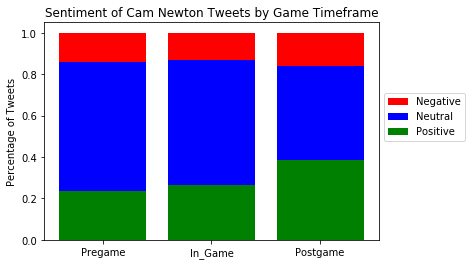

In [28]:
# create the gametype and sentiment lists to be used in the stacked bar chart
sentiment = cam_stacked_df['sentiment'].unique().tolist()
gametype = cam_stacked_df['Game_Type'].unique().tolist()
# create the arrays for tweet counts for each sentiment by gametype
negative = np.array(cam_neg_df['Percent of Total'])
neutral = np.array(cam_neu_df['Percent of Total'])
positive = np.array(cam_pos_df['Percent of Total'])

ind = [x for x, _ in enumerate(sentiment)]
# create the stacked bar chart
plt.bar(ind, negative, width=0.8, label="Negative", color='red', bottom=neutral+positive)
plt.bar(ind, neutral, width=0.8, label="Neutral", color='blue', bottom=positive)
plt.bar(ind, positive, width=0.8, label="Positive", color='green')

plt.xticks(ind, gametype)
plt.ylabel("Percentage of Tweets")
plt.legend(bbox_to_anchor=(1, 0.7), loc='upper left')
plt.title("Sentiment of Cam Newton Tweets by Game Timeframe")
plt.savefig('cam_stacked.png')
plt.show()

In [29]:
# From this graph, you can see the positive tweets went up from the begining of the game to the end of the game
# the neutral tweets decreased from the pregame to postgame
# the negative tweets decreased from pregame to ingame, but increased from ingame to postgame

In [32]:
cam_stacked_df.sort_values(by="sentiment")

,Game_Type,sentiment,tweet,Percent of Total
6,Pregame,Negative,6,0.142857
0,In_Game,Negative,2,0.133333
3,Postgame,Negative,88,0.162662
7,Pregame,Neutral,26,0.619048
1,In_Game,Neutral,9,0.600000
4,Postgame,Neutral,244,0.451017
8,Pregame,Positive,10,0.238095
2,In_Game,Positive,4,0.266667
5,Postgame,Positive,209,0.386322
